Data Cleaning

In [1]:
#Upload Economic freedom index file to colab
from google.colab import files 
  
uploaded = files.upload()

Saving economic_freedom_index2019_data.csv to economic_freedom_index2019_data.csv


In [2]:
#Import data from file into a dataframe
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['economic_freedom_index2019_data.csv']),encoding='latin-1') 
pd.set_option('display.max_columns', None)
print(df)

     CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5          

In [3]:
#Check data types of all columns
df.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

We observe that 2 columns have the word "Gov't" which could cause problem while slicing data or visualization. Hence we convert it to simply "Govt"

In [4]:
df.rename(columns={"Gov't Spending": "Govt spending", "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP"}, inplace=True)

In [5]:
#Check the data types again to confirm the changes have taken effect
df.dtypes

CountryID                       int64
Country Name                   object
WEBNAME                        object
Region                         object
World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Govt spending                 float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Govt Expenditure % of GDP     float64
Country                        object
Population (Millions)          object
GDP (Billion

We observe that there are certain numeric (float) columns such as Population whiich are identified as 'object' instead of 'float64'. Let us examine these columns and try to figure out the problem.

In [6]:
df.head

<bound method NDFrame.head of      CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0     

We observe that some of these columns have commas and dollar signs which cause them to be identified as type 'object'. Let us now get rid of ',' and '$' from all these columns.

In [7]:
df.replace(',','', regex=True, inplace=True)


In [8]:
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].str.replace('$', '')

df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].str.replace('$', '')

In [9]:
#check if the changes have taken effect
print(df)

     CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5          

Let us check the data types of columns now to see if our issue is resolved.

In [10]:
df.dtypes

CountryID                       int64
Country Name                   object
WEBNAME                        object
Region                         object
World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Govt spending                 float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Govt Expenditure % of GDP     float64
Country                        object
Population (Millions)          object
GDP (Billion

Looks like the columns are still being identified as 'object' instead of 'float64'. Let us dig deep and look at all the unique values in each of the columns to see if there are any 'string' type values present. If so we need to fix such values.

In [11]:
df['Population (Millions)'].unique()

array(['35.5', '2.9', '41.5', '28.2', '44.1', '3.0', '24.8', '8.8', '9.8',
       '0.4', '1.5', '163.2', '0.3', '9.5', '11.4', '11.1', '0.8', '3.5',
       '2.2', '207.7', '7.1', '18.9', '52.6', '10.9', '16.0', '24.3',
       '36.7', '0.5', '5.0', '12.2', '18.4', '1390.1', '49.3', '86.7',
       '4.3', '25.0', '4.1', '11.5', '0.9', '10.6', '5.7', '1.0', '0.1',
       '10.2', '16.8', '94.8', '6.4', '5.9', '1.3', '1.1', '92.7', '5.5',
       '64.8', '1.9', '2.1', '3.7', '82.7', '28.3', '10.8', '16.9',
       '13.0', '1.7', '11.0', '8.3', '7.4', '1316.9', '262.0', '81.4',
       '38.9', '4.7', '8.7', '60.6', '2.8', '126.7', '18.2', '46.7',
       '25.4', '51.5', '4.4', '6.3', '6.7', '2.0', '4.5', '38000 ppl.',
       '0.6', '25.6', '19.2', '32.1', '3.9', '123.5', '3.1', '34.9',
       '29.5', '2.3', '29.3', '17.1', '4.8', '6.2', '18.8', '188.7',
       '5.3', '197.3', '7.0', '31.8', '105.3', '38.0', '10.3', '2.7',
       '19.6', '144.0', '11.8', '0.2', '32.4', '15.9', '5.6', '5.4',
      

In [12]:
df[df['Population (Millions)']=='38000 ppl.']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
99,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,7.0,12.5,NaN,NaN,Liechtenstein,38000 ppl.,6.1 CHF (2014 ),NaN,NaN,139100 (2009 est.),2.1 (2016),NaN,NaN,NaN


In [13]:
df.at[99,'Population (Millions)']= 0.038
df[df['Population (Millions)']==0.038]

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
99,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,7.0,12.5,NaN,NaN,Liechtenstein,0.038,6.1 CHF (2014 ),NaN,NaN,139100 (2009 est.),2.1 (2016),NaN,NaN,NaN


In [14]:
df['GDP (Billions, PPP)'].unique()


array(['69.6 ', '36.0 ', '632.9 ', '190.3 ', '920.2 ', '28.3 ', '1246.5 ',
       '439.6 ', '171.8 ', '11.6 ', '70.4 ', '687.1 ', '5.2 ', '178.9 ',
       '528.5 ', '3.2 ', '25.3 ', '7.0 ', '83.6 ', '44.6 ', '38.9 ',
       '3240.3 ', '33.5 ', '153.1 ', '35.8 ', '328.7 ', '8.0 ', '64.3 ',
       '88.9 ', '1769.3 ', '3.7 ', '3.4 ', '28.6 ', '451.1 ', '23159.1 ',
       '714.0 ', '1.3 ', '68.5 ', '28.9 ', '83.9 ', '96.9 ', '101.3 ',
       '148.0 ', '31.6 ', '375.7 ', '286.8 ', '3.6 ', '0.8 ', '172.4 ',
       '192.6 ', '1201.2 ', '57.0 ', '30.4 ', '9.4 ', '41.6 ', '11.3 ',
       '200.2 ', '8.7 ', '244.0 ', '2835.8 ', '36.7 ', '39.7 ', '4170.8 ',
       '133.7 ', '298.7 ', '137.8 ', '26.5 ', '3.1 ', '6.3 ', '19.9 ',
       '46.2 ', '454.9 ', '289.0 ', '17.6 ', '9459.0 ', '3242.8 ',
       '1644.7 ', '658.8 ', '357.2 ', '316.5 ', '2310.9 ', '26.1 ',
       '5428.8 ', '89.1 ', '477.6 ', '163.1 ', '0.2 ', '40.0 (2015 est.)',
       '2029.0 ', '19.6 ', '291.5 ', '23.0 ', '49.2 ', '53.9 ', '

In [15]:
df[df['GDP (Billions, PPP)']=='40.0 (2015 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
88,87,Korea North,NorthKorea,Asia-Pacific,180.0,43.0,5.9,31.6,5.0,24.4,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,50.0,NaN,NaN,NaN,100.0,Korea North,25.4,40.0 (2015 est.),1.1,NaN,1700 (2015 est.),4.8,NaN,63.4,NaN


In [16]:
df.at[88,'GDP (Billions, PPP)']= 40.0
df[df['GDP (Billions, PPP)']=='40.0 (2015 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [17]:
df[df['GDP (Billions, PPP)']=='6.1 CHF (2014 )']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
99,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,7.0,12.5,NaN,NaN,Liechtenstein,0.038,6.1 CHF (2014 ),NaN,NaN,139100 (2009 est.),2.1 (2016),NaN,NaN,NaN


In [18]:
df.at[99,'GDP (Billions, PPP)']= 6.1
df[df['GDP (Billions, PPP)']=='6.1 CHF (2014 )']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [19]:
df['GDP per Capita (PPP)'].unique()


array(['1958', '12507', '15237', '6753', '20876', '9456', '50334',
       '49869', '17492', '31139', '48505', '4211', '18664', '18931',
       '46553', '8324', '2277', '8744', '7547', '12724', '17828', '15603',
       '78196', '21687', '1889', '6244', '735', '4012', '3660', '48265',
       '6944', '677', '2344', '24537', '16660', '14485', '1588', '790',
       '6642', '16877', '3883', '24424', '12920', '37023', '35512',
       '49883', '3559', '11102', '16944', '11482', '12671', '8948',
       '36017', '1581', '31750', '9884', '2161', '9777', '44333', '43761',
       '19254', '1713', '10747', '50425', '4729', '27737', '8145', '2041',
       '1845', '8161', '1815', '5562', '61393', '29474', '51842', '7183',
       '12377', '20200', '16954', '75538', '36340', '38140', '9163',
       '42832', '12494', '26252', '3491', '1976', '1700 (2015 est.)',
       '39434', '10515', '66163', '3667', '7366', '27644', '19439',
       '3581', '1354', '9986', '139100 (2009 est.)', '32299', '106374',
     

In [20]:
df[df['GDP per Capita (PPP)']=='1700 (2015 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
88,87,Korea North,NorthKorea,Asia-Pacific,180.0,43.0,5.9,31.6,5.0,24.4,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,50.0,NaN,NaN,NaN,100.0,Korea North,25.4,40,1.1,NaN,1700 (2015 est.),4.8,NaN,63.4,NaN


In [21]:
df.at[88,'GDP per Capita (PPP)']= 1700
df[df['GDP per Capita (PPP)']=='1700 (2015 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [22]:
df[df['GDP per Capita (PPP)']=='139100 (2009 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
99,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,7.0,12.5,NaN,NaN,Liechtenstein,0.038,6.1,NaN,NaN,139100 (2009 est.),2.1 (2016),NaN,NaN,NaN


In [23]:
df.at[99,'GDP per Capita (PPP)']= 139100
df[df['GDP per Capita (PPP)']=='139100 (2009 est.)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [24]:
df['Unemployment (%)'].unique()


array(['8.8', '13.9', '10.0', '8.2', '8.7', '18.2', '5.6', '5.5', '5.0',
       '12.6', '1.2', '4.4', '9.7', '0.5', '7.4', '9.3', '2.5', '2.4',
       '3.1', '25.6', '17.4', '13.3', '7.1', '6.2', '6.3', '0.8', '1.6',
       '0.2', '4.2', '10.3', '6.0', '5.9', '7.0', '4.7', '8.9', '4.3',
       '3.7', '11.0', '8.1', '2.6', '11.2', '2.9', '5.7', '5.8', nan,
       '3.8', '12.1', '4.5', '6.9', '6.4', '26.4', '5.2', '8.6', '9.4',
       '19.7', '9.5', '11.6', '21.5', '2.7', '6.1', '12.0', '14.0', '2.8',
       '3.5', '12.5', '14.9', '4.9', '11.5', '4.8', '2.1', '7.3', '0.7',
       '6.6', '27.3', '17.7', '2.1 (2016)', '2.0', '22.4', '1.8', '3.4',
       '7.9', '4.0', '9.9', '16.1', '25.0', '23.3', '0.4', '3.3', '4.6',
       '3.6', '0.1', '1.3', '21.0', '18.3', '13.5', '14.1', '17.2', '4.1',
       '12.7', '6.7', '2.2', '1.1', '15.4', '11.3', '1.7', '7.2', '7.7',
       '7.8'], dtype=object)

In [25]:
df[df['Unemployment (%)']=='2.1 (2016)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
99,97,Liechtenstein,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,7.0,12.5,NaN,NaN,Liechtenstein,0.038,6.1,NaN,NaN,139100,2.1 (2016),NaN,NaN,NaN


In [26]:
df.at[99,'Unemployment (%)']= 2.1
df[df['Unemployment (%)']=='2.1 (2016)']

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Govt Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [27]:
df['FDI Inflow (Millions)'].unique()


array(['53.9', '1119.1', '1203.0', '-2254.5', '11857.0', '245.7',
       '46368.0', '9629.6', '2867.0', '927.7', '518.9', '2151.6', '286.2',
       '1276.4', '740.4', '77.0', '184.4', '10.3', '724.7', '425.2',
       '400.6', '62712.6', '-46.3', '1070.7', '485.9', '4341.0', '0.3',
       '2784.4', '672.5', '24243.8', '108.6', '17.2', '335.0', '6729.6',
       '136320.0', '14518.0', '8.6', '1340.2', '1158.8', '3007.1',
       '674.7', '2104.2', nan, '6343.3', '7412.2', '-3114.7', '165.0',
       '18.9', '3570.0', '606.4', '7391.7', '791.9', '304.1', '55.5',
       '784.4', '-136.8', '3586.4', '299.0', '1327.9', '49794.9',
       '1498.0', '87.5', '1861.9', '34726.3', '3255.0', '4046.0',
       '1146.7', '576.5', '16.6', '212.2', '374.9', '1185.7', '104333.0',
       '2491.6', '-5.4', '39916.1', '23063.1', '5019.0', '-5032.4',
       '28974.6', '18954.0', '17077.1', '888.0', '10429.8', '1664.8',
       '4633.7', '671.7', '1.4', '63.4', '17052.8', '3.6', '300.5',
       '93.8', '813.0', '

Now that we have fixed all the issue causing values from our columns let us change the datatypes for these columns to 'float64'.

In [28]:
df=df.astype({'Population (Millions)': 'float64','GDP (Billions, PPP)': 'float64','GDP per Capita (PPP)': 'float64','Unemployment (%)': 'float64','FDI Inflow (Millions)': 'float64' })

In [29]:
df.dtypes

CountryID                       int64
Country Name                   object
WEBNAME                        object
Region                         object
World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Govt spending                 float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Govt Expenditure % of GDP     float64
Country                        object
Population (Millions)         float64
GDP (Billion

All the columns are fixed now and we thus conclude the Data Cleaning process.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Recession Analysis

In [37]:
#Create a new column called recession
df["Recession"] = np.where(((df['GDP Growth Rate (%)'] < 0) | (df['5 Year GDP Growth Rate (%)'] < 0)), 1 ,0)

In [38]:
df_new=df.drop(['CountryID', 'Country Name','WEBNAME','Region','World Rank','Region Rank','Country'], axis=1)

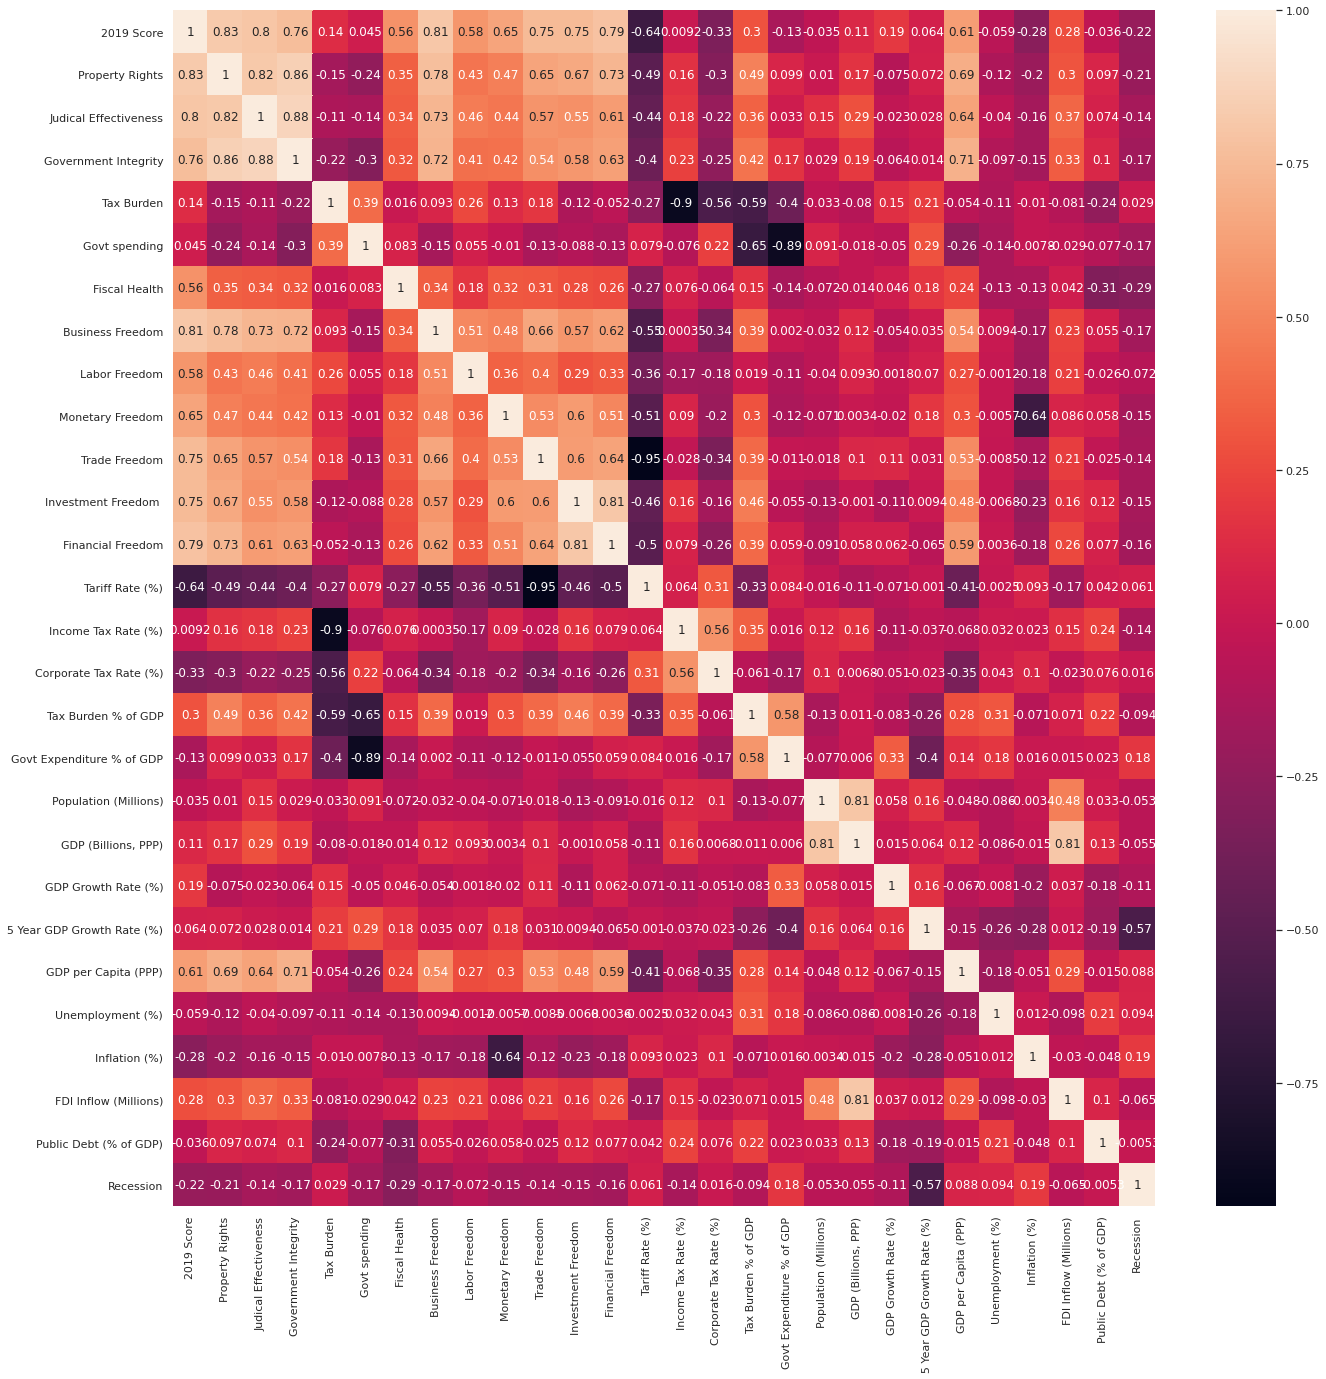

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(22,22)})
sns.heatmap(df_new.corr(), annot = True)

High public debt does not amount to Economic Recession. Let us have a look at countries with high public debt as percentage of GDP to confirm what we see in the correlation heat map.

In [55]:
d1=df.nlargest(20,['Public Debt (% of GDP)'])[['Country Name' ,'Public Debt (% of GDP)']]
d2=df.nlargest(20,['GDP (Billions, PPP)'])[['Country Name' ,'GDP (Billions, PPP)']]
pd.merge(d1, d2, how='inner')

,Country Name,Public Debt (% of GDP),"GDP (Billions, PPP)"
0,Japan,236.4,5428.8
1,Italy,131.5,2310.9
2,United States,107.8,19390.6


In [41]:
d1=df.nlargest(20,['Public Debt (% of GDP)'])[['Country Name' ,'Public Debt (% of GDP)']]
d2=df.nlargest(20,['GDP per Capita (PPP)'])[['Country Name' ,'GDP per Capita (PPP)']]
pd.merge(d1, d2, how='inner')

,Country Name,Public Debt (% of GDP),GDP per Capita (PPP)
0,Singapore,110.9,93906.0
1,United States,107.8,59501.0


We observe that most of these nations with high debt are developed nations. Hence we confirm that High Public Debt does not amount to recession